In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
medical_data = pd.read_csv('datasets/KaggleV2-May-2016.csv')
medical_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#  Data Preparation

fix typos

In [3]:
medical_data.rename(columns = {'Alcoolism': 'Alchoholism',
                         'Hipertension': 'Hypertension',
                         'Handcap': 'Handicap'}, inplace = True)
medical_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
medical_data.shape

(110527, 14)

#### Checking for null values and data types

In [5]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hypertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handicap        110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


In [6]:
medical_data.ScheduledDay = medical_data.ScheduledDay.apply(np.datetime64)
medical_data.AppointmentDay = medical_data.AppointmentDay.apply(np.datetime64)

In [7]:
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [8]:
medical_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
medical_data.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

#### Checking for values's distribution 

In [10]:
print('Genders values in the datasets: ', sorted(medical_data.Gender.unique()))
print('Ages values in the datasets: ', sorted(medical_data.Age.unique()))
print('Neighbourhoods values in the datasets: ', sorted(medical_data.Neighbourhood.unique()))
print('Scholarship values in the datasets: ', sorted(medical_data.Scholarship.unique()))
print('Hypertension values in the datasets: ', sorted(medical_data.Hypertension.unique()))
print('Diabetes values in the datasets: ', sorted(medical_data.Diabetes.unique()))
print('Alcoholism values in the datasets: ', sorted(medical_data.Alcoholism.unique()))
print('Handicap values in the datasets: ', sorted(medical_data.Handicap.unique()))
print('SMS received values in the datasets: ', sorted(medical_data.SMS_received.unique()))
print('No show values in the datasets: ', sorted(medical_data['No-show'].unique()))

Genders values in the datasets:  ['F', 'M']
Ages values in the datasets:  [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Neighbourhoods values in the datasets:  ['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', '

In [11]:
medical_data['Gender'] = medical_data['Gender'].replace({'F':0, 'M':1})

In [12]:
medical_data['No-show'] = medical_data['No-show'].replace({'No':0, 'Yes':1})

In [13]:
medical_data['Handicap'] = medical_data['Handicap'].replace({2:1, 3:1, 4:1})

In [14]:
medical_data = medical_data[(medical_data.Age >= 0) & (medical_data.Age <= 100)]

In [15]:
print('Genders values in the datasets: ', sorted(medical_data.Gender.unique()))
print('Ages values in the datasets: ', sorted(medical_data.Age.unique()))
print('Handicap values in the datasets: ', sorted(medical_data.Handicap.unique()))
print('No show values in the datasets: ', sorted(medical_data['No-show'].unique()))

Genders values in the datasets:  [0, 1]
Ages values in the datasets:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
Handicap values in the datasets:  [0, 1]
No show values in the datasets:  [0, 1]


#### Adding days of waiting to the appointment column to the data frame

In [16]:
medical_data['Waiting_days'] = medical_data.AppointmentDay -  medical_data.ScheduledDay 
medical_data['Waiting_days'] = medical_data['Waiting_days'] / np.timedelta64(1,'D')
medical_data['Waiting_days'] = np.float64(medical_data['Waiting_days'])
medical_data['Waiting_days'] = np.ceil(medical_data['Waiting_days'])
medical_data['Waiting_days'] = np.int64(medical_data['Waiting_days'])
medical_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_days
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


In [17]:
print('Waiting_days values in the datasets: ', sorted(medical_data['Waiting_days'].unique()))

Waiting_days values in the datasets:  [-6, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


In [18]:
medical_data = medical_data[medical_data.Waiting_days >= 0]

In [19]:
print('Waiting_days values in the datasets: ', sorted(medical_data['Waiting_days'].unique()))

Waiting_days values in the datasets:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179]


In [20]:
medical_data.shape

(110514, 15)

# Data Analysis

In [21]:
medical_data.describe().T.style.format("{:.1f}")

,count,mean,std,min,25%,50%,75%,max
PatientId,110514.0,147483207499650.0,256074244413556.8,39217.8,4172457111246.0,31730158923911.0,94389629939367.0,999981631772427.0
AppointmentID,110514.0,5675303.1,71297.5,5030230.0,5640283.2,5680570.0,5725523.8,5790484.0
Gender,110514.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
Age,110514.0,37.1,23.1,0.0,18.0,37.0,55.0,100.0
Scholarship,110514.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
Hypertension,110514.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
Diabetes,110514.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
Alcoholism,110514.0,0.0,0.2,0.0,0.0,0.0,0.0,1.0
Handicap,110514.0,0.0,0.1,0.0,0.0,0.0,0.0,1.0
SMS_received,110514.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0


In [22]:
count_shown = medical_data.groupby('No-show')['PatientId'].count()
nums_not_show_general = count_shown[1] 
nums_show_general = count_shown[0]
prob_not_show_general = nums_show_general / (nums_not_show_general + nums_show_general)

print(f'The probability that a patient will show up to a doctor appointment is {prob_not_show_general}')

The probability that a patient will show up to a doctor appointment is 0.7981160757913025


In [23]:
males_data = medical_data.loc[medical_data['Gender'] == 1]
males_data = males_data.reset_index(drop=True)
males_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_days
0,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
1,7.542951e+12,5620163,1,2016-04-26 08:44:12,2016-04-29,29,NOVA PALESTINA,0,0,0,0,0,1,1,3
2,9.113946e+14,5636249,1,2016-04-28 14:52:07,2016-04-29,28,NOVA PALESTINA,0,0,0,0,0,0,0,1
3,8.457439e+13,5633121,1,2016-04-28 08:51:47,2016-04-29,50,NOVA PALESTINA,0,0,0,0,0,0,0,1
4,8.632298e+14,5616091,1,2016-04-25 13:29:16,2016-04-29,13,CONQUISTA,0,0,0,0,0,1,1,4


In [24]:
males_data.shape

(38685, 15)

In [25]:
females_data = medical_data.loc[medical_data['Gender'] == 0]
females_data = females_data.reset_index(drop=True)
females_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_days
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
2,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
3,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0
4,9.598513e+13,5626772,0,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,0,2


In [26]:
females_data.shape

(71829, 15)

In [27]:
count_show_males = males_data.groupby('No-show')['PatientId'].count()
nums_not_show_males = count_show_males[1] 
nums_show_males = count_show_males[0]
prob_not_show_males = nums_show_males / (nums_not_show_males + nums_show_males)

print(f'The probability that a male patient will show up to a doctor appointment is\
 {prob_not_show_males}')

The probability that a male patient will show up to a doctor appointment is 0.800361897376244


In [28]:
count_show_females = females_data.groupby('No-show')['PatientId'].count()
nums_not_show_females = count_show_females[1] 
nums_show_females = count_show_females[0]
prob_not_show_females = nums_show_females / (nums_not_show_females + nums_show_females)

print(f'The probability that a female patient will show up to a doctor appointment is\
 {prob_not_show_females}')

The probability that a female patient will show up to a doctor appointment is 0.796906541925963


In [29]:
medical_data.Age.mean()

37.08468610311816

In [30]:
males_data.Age.mean()

33.737443453534965

In [31]:
females_data.Age.mean()

38.88741316181486

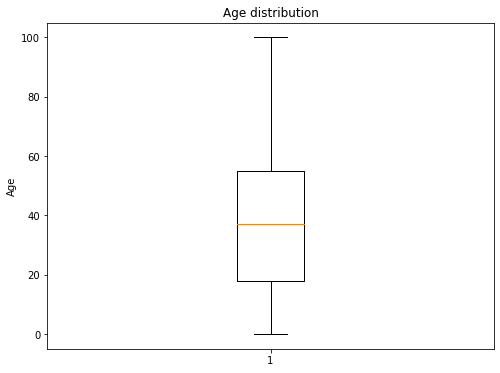

In [32]:
plt.figure(figsize=(8, 6))
plt.title('Age distribution')
plt.boxplot(medical_data.Age)
plt.ylabel('Age')
plt.show()

In [33]:
group_by_age = medical_data.groupby('Age')['No-show'].count()
group_by_age = group_by_age.reset_index()
group_by_age = group_by_age.rename({'No-show': 'nums_patients'}, axis=1)
group_by_age_sum = medical_data.groupby('Age')['No-show'].sum()
group_by_age['No-show'] = group_by_age_sum.values
group_by_age['show'] = group_by_age['nums_patients'] - group_by_age['No-show']
group_by_age['prob_show'] = group_by_age['show'] / group_by_age['nums_patients']
group_by_age

,Age,nums_patients,No-show,show,prob_show
0,0,3539,639,2900,0.819441
1,1,2273,415,1858,0.817422
2,2,1618,252,1366,0.844252
3,3,1513,277,1236,0.816920
4,4,1299,282,1017,0.782910
...,...,...,...,...,...
96,96,17,1,16,0.941176
97,97,11,2,9,0.818182
98,98,6,1,5,0.833333
99,99,1,0,1,1.000000


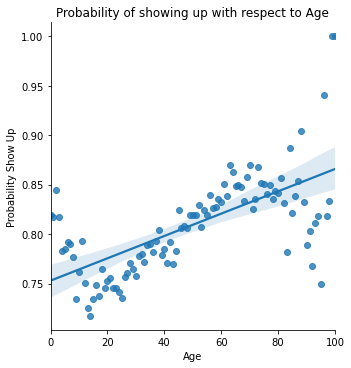

In [34]:
sns.lmplot(data=group_by_age, x = 'Age', y = 'prob_show', fit_reg = True)
plt.title('Probability of showing up with respect to Age')
plt.ylabel('Probability Show Up')
plt.show()

In [35]:
group_by_wait = medical_data.groupby('Waiting_days')['No-show'].count()
group_by_wait = group_by_wait.reset_index()
group_by_wait = group_by_wait.rename({'No-show': 'nums_patients'}, axis=1)
group_by_wait_sum = medical_data.groupby('Waiting_days')['No-show'].sum()
group_by_wait['No-show'] = group_by_wait_sum.values
group_by_wait['show'] = group_by_wait['nums_patients'] - group_by_wait['No-show']
group_by_wait['prob_show'] = group_by_wait['show'] / group_by_wait['nums_patients']
group_by_wait

,Waiting_days,nums_patients,No-show,show,prob_show
0,0,38560,1792,36768,0.953527
1,1,5213,1113,4100,0.786495
2,2,6724,1602,5122,0.761749
3,3,2735,642,2093,0.765265
4,4,5290,1231,4059,0.767297
...,...,...,...,...,...
124,155,10,6,4,0.400000
125,162,11,2,9,0.818182
126,169,8,1,7,0.875000
127,176,16,6,10,0.625000


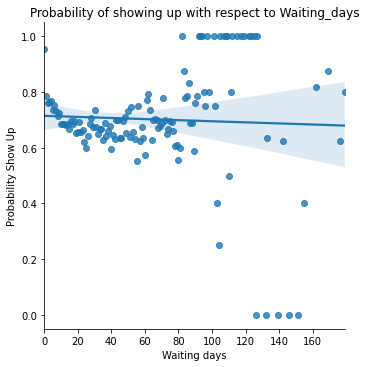

In [36]:
sns.lmplot(data=group_by_wait, x = 'Waiting_days', y = 'prob_show', fit_reg = True)
plt.title('Probability of showing up with respect to Waiting_days')
plt.xlabel('Waiting days')
plt.ylabel('Probability Show Up')
plt.show()

In [37]:
group_by_hood = medical_data.groupby('Neighbourhood')['No-show'].count()
group_by_hood = group_by_hood.reset_index()
group_by_hood = group_by_hood.rename({'No-show': 'nums_patients'}, axis=1)
group_by_hood_sum = medical_data.groupby('Neighbourhood')['No-show'].sum()
group_by_hood['No-show'] = group_by_hood_sum.values
group_by_hood['show'] = group_by_hood['nums_patients'] - group_by_hood['No-show']
group_by_hood['prob_show'] = group_by_hood['show'] / group_by_hood['nums_patients']
group_by_hood

,Neighbourhood,nums_patients,No-show,show,prob_show
0,AEROPORTO,8,1,7,0.875000
1,ANDORINHAS,2258,518,1740,0.770593
2,ANTÔNIO HONÓRIO,271,50,221,0.815498
3,ARIOVALDO FAVALESSA,282,62,220,0.780142
4,BARRO VERMELHO,423,91,332,0.784870
...,...,...,...,...,...
76,SÃO JOSÉ,1976,428,1548,0.783401
77,SÃO PEDRO,2448,515,1933,0.789624
78,TABUAZEIRO,3131,572,2559,0.817311
79,UNIVERSITÁRIO,152,32,120,0.789474


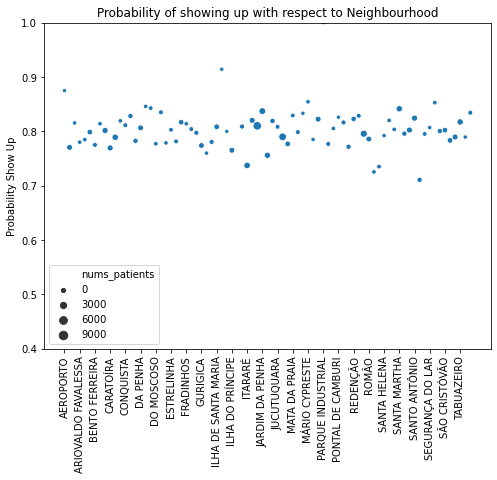

In [38]:
plt.figure(figsize=(8, 6))

sns.scatterplot(data=group_by_hood, x='Neighbourhood', y='prob_show', size='nums_patients')
plt.title('Probability of showing up with respect to Neighbourhood')
plt.ylim(0.4, 1)
plt.xlabel('')
plt.ylabel('Probability Show Up')
plt.xticks(group_by_hood.Neighbourhood[::3] ,rotation=90)
plt.show()

In [39]:
medical_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_days
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,35
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,35
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,41
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,41


In [40]:
medical_data_binary =  medical_data.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay',
                                         'Neighbourhood', 'Waiting_days', 'Age'], axis=1)
medical_data_binary.head()

,Gender,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,1,1,0,0,0,0


In [41]:
medical_data_binary.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,110514.0,0.350046,0.476986,0.0,0.0,0.0,1.0,1.0
Scholarship,110514.0,0.098277,0.297690,0.0,0.0,0.0,0.0,1.0
Hypertension,110514.0,0.197260,0.397932,0.0,0.0,0.0,0.0,1.0
Diabetes,110514.0,0.071873,0.258279,0.0,0.0,0.0,0.0,1.0
Alcoholism,110514.0,0.030403,0.171695,0.0,0.0,0.0,0.0,1.0
Handicap,110514.0,0.020224,0.140765,0.0,0.0,0.0,0.0,1.0
SMS_received,110514.0,0.321054,0.466884,0.0,0.0,0.0,1.0,1.0
No-show,110514.0,0.201884,0.401408,0.0,0.0,0.0,0.0,1.0


In [42]:
for col in medical_data_binary.columns[:-1]:
    nums_count = medical_data_binary.groupby(col)['No-show'].count()
    nums_sum = medical_data_binary.groupby(col)['No-show'].sum()
    prob_show_with_positive_binary = 1 - nums_sum[0] / nums_count[0]
    prob_show_with_negative_binary = 1 - nums_sum[1] / nums_count[1]
    print(f'{col} is 1:', '{p:.2%}'.format(p=prob_show_with_positive_binary))
    print(f'{col} is 0:', '{p:.2%}'.format(p=prob_show_with_negative_binary))    

Gender is 1: 79.69%
Gender is 0: 80.04%
Scholarship is 1: 80.20%
Scholarship is 0: 76.26%
Hypertension is 1: 79.10%
Hypertension is 0: 82.70%
Diabetes is 1: 79.64%
Diabetes is 0: 82.00%
Alcoholism is 1: 79.81%
Alcoholism is 0: 79.85%
Handicap is 1: 79.77%
Handicap is 0: 82.01%
SMS_received is 1: 83.30%
SMS_received is 0: 72.42%


result_index = medical_data_binary.columns[1:-2]
result0 = []
result1 = []
for col in medical_data_binary.columns[1:-2]:
    nums_count = medical_data_binary.groupby(col)['No-show'].count()
    nums_sum = medical_data_binary.groupby(col)['No-show'].sum()
    prob_show_without_med_condiction = 1 - nums_sum[0] / nums_count[0]
    prob_show_with_med_condiction = 1 - nums_sum[1] / nums_count[1]
    result0.append(prob_show_without_med_condiction)
    result1.append(prob_show_with_med_condiction)
    
    plt.figure(figsize=(3, 2))
    plt.title(f'probability show when suffering from {col}')
    sns.barplot([0, 1] ,[prob_show_without_med_condiction, prob_show_with_med_condiction])
    plt.ylim(0, 1)
    plt.show()   

In [43]:
medical_condition_names = medical_data_binary.columns[1:-2]
prob_list = []
with_condition = []
for condition in medical_condition_names:
    nums_count = medical_data_binary.groupby(condition)['No-show'].count()
    nums_sum = medical_data_binary.groupby(condition)['No-show'].sum()
    prob_show_without_med_condiction = 1 - nums_sum[0] / nums_count[0]
    prob_show_with_med_condiction = 1 - nums_sum[1] / nums_count[1]
    prob_list.extend([prob_show_without_med_condiction, prob_show_with_med_condiction])
    with_condition.extend([0, 1])
    
medical_condition_names_list = list(medical_condition_names)
medical_condition_names_list.extend(medical_condition_names_list)
medical_condition_names_list

data = {'medical_condition': medical_condition_names_list, 'with_condition': with_condition, 'prob': prob_list}
data = pd.DataFrame(data)
data

,medical_condition,with_condition,prob
0,Scholarship,0,0.801983
1,Hypertension,1,0.762637
2,Diabetes,0,0.791025
3,Alcoholism,1,0.826972
4,Handicap,0,0.796424
5,Scholarship,1,0.819967
6,Hypertension,0,0.798104
7,Diabetes,1,0.798512
8,Alcoholism,0,0.797662
9,Handicap,1,0.820134


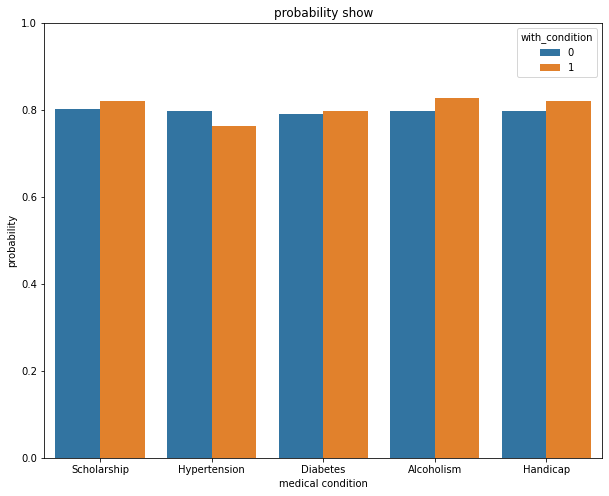

In [44]:
plt.figure(figsize=(10, 8))
plt.title('probability show')
sns.barplot(data['medical_condition'] ,data['prob'], hue=data['with_condition'])
plt.xlabel('medical condition')
plt.ylabel('probability')

plt.ylim(0, 1)
plt.show()

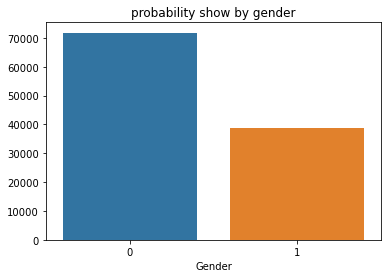

In [45]:
nums_count = medical_data_binary.groupby('Gender')['No-show'].count()
    
plt.title('probability show by gender')
sns.barplot(nums_count.index, nums_count.values)
plt.show()

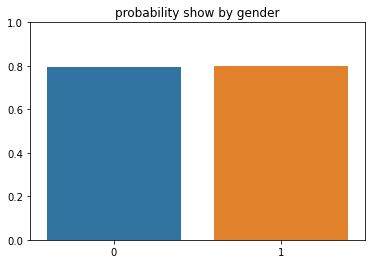

In [46]:
nums_count = medical_data_binary.groupby('Gender')['No-show'].count()
nums_sum = medical_data_binary.groupby('Gender')['No-show'].sum()
prob_show_female = 1 - nums_sum[0] / nums_count[0]
prob_show_male = 1 - nums_sum[1] / nums_count[1]
    
plt.title('probability show by gender')
sns.barplot([0, 1] ,[prob_show_female, prob_show_male])
plt.ylim(0, 1)
plt.show()

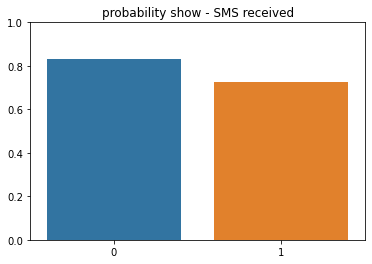

In [47]:
nums_count = medical_data_binary.groupby('SMS_received')['No-show'].count()
nums_sum = medical_data_binary.groupby('SMS_received')['No-show'].sum()
prob_show_no_sms = 1 - nums_sum[0] / nums_count[0]
prob_show_sms = 1 - nums_sum[1] / nums_count[1]
    
plt.title('probability show - SMS received')
sns.barplot([0, 1] ,[prob_show_no_sms, prob_show_sms])
plt.ylim(0, 1)
plt.show()

# Prediction Model

In [48]:
medical_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,Waiting_days
0,2.987250e+13,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,5.589978e+14,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,4.262962e+12,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,8.679512e+11,5642828,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,8.841186e+12,5642494,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572134e+12,5651768,0,2016-05-03 09:15:35,2016-06-07,56,MARIA ORTIZ,0,0,0,0,0,1,0,35
110523,3.596266e+12,5650093,0,2016-05-03 07:27:33,2016-06-07,51,MARIA ORTIZ,0,0,0,0,0,1,0,35
110524,1.557663e+13,5630692,0,2016-04-27 16:03:52,2016-06-07,21,MARIA ORTIZ,0,0,0,0,0,1,0,41
110525,9.213493e+13,5630323,0,2016-04-27 15:09:23,2016-06-07,38,MARIA ORTIZ,0,0,0,0,0,1,0,41


In [49]:
medical_data.describe().T.style.format("{:.1f}")

,count,mean,std,min,25%,50%,75%,max
PatientId,110514.0,147483207499650.0,256074244413556.8,39217.8,4172457111246.0,31730158923911.0,94389629939367.0,999981631772427.0
AppointmentID,110514.0,5675303.1,71297.5,5030230.0,5640283.2,5680570.0,5725523.8,5790484.0
Gender,110514.0,0.4,0.5,0.0,0.0,0.0,1.0,1.0
Age,110514.0,37.1,23.1,0.0,18.0,37.0,55.0,100.0
Scholarship,110514.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
Hypertension,110514.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0
Diabetes,110514.0,0.1,0.3,0.0,0.0,0.0,0.0,1.0
Alcoholism,110514.0,0.0,0.2,0.0,0.0,0.0,0.0,1.0
Handicap,110514.0,0.0,0.1,0.0,0.0,0.0,0.0,1.0
SMS_received,110514.0,0.3,0.5,0.0,0.0,0.0,1.0,1.0


In [50]:
from sklearn.model_selection import train_test_split

features = medical_data.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Neighbourhood',
                              'No-show'], axis=1)
target = medical_data['No-show']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2) 

In [51]:
features

,Gender,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Waiting_days
0,0,62,0,1,0,0,0,0,0
1,1,56,0,0,0,0,0,0,0
2,0,62,0,0,0,0,0,0,0
3,0,8,0,0,0,0,0,0,0
4,0,56,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
110522,0,56,0,0,0,0,0,1,35
110523,0,51,0,0,0,0,0,1,35
110524,0,21,0,0,0,0,0,1,41
110525,0,38,0,0,0,0,0,1,41


In [52]:
x_train.shape , y_train.shape

((88411, 9), (88411,))

In [53]:
x_test.shape , y_test.shape 

((22103, 9), (22103,))

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logistic_model = LogisticRegression(penalty='l2', solver='saga')

logistic_model.fit(x_train, y_train)

c:\users\ayelin\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_pred = logistic_model.predict(x_test)

In [56]:
confusion_matrix = confusion_matrix(y_test, y_pred)

print(confusion_matrix)

[[17534   124]
 [ 4378    67]]


In [57]:
logistic_score = logistic_model.score(x_train, y_train)
print(f"Training score: {logistic_score * 100}%")

Training score: 79.45165194376266%


In [58]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc * 100}%")

Accuracy: 79.6317242003348%


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
pre = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy : ' , acc)

Accuracy :  0.796317242003348
